In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.proportion import proportion_confint

## **Задание №1**
### Написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [2]:
def calculate_retention(reg_data, auth_data):
    # Загружаем данные о времени регистрации и времени захода пользователей
    reg_data = reg_data.copy()
    auth_data = auth_data.copy()

    # Преобразуем timestamp в формат даты
    reg_data['reg_date'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.date
    auth_data['auth_date'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.date

    # Слияние данных по uid
    merged_data = pd.merge(reg_data, auth_data, on='uid', how='inner')

    # Создаем столбец с датами заходов в игру после регистрации
    merged_data['retention_days'] = (merged_data['auth_date'] - merged_data['reg_date']).dt.days

    # Группируем данные по retention_days и подсчитываем уникальные uid
    retention_counts = merged_data.groupby('retention_days')['uid'].nunique().reset_index()

    # Переименовываем столбцы для более ясного понимания
    retention_counts.rename(columns={'retention_days': 'days_after_registration', 'uid': 'unique_users'}, inplace=True)

    return retention_counts

In [3]:
# Загружаем имеющиеся данные о времени регистрации и времени захода пользователей
reg_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kondrashkina/shared/problem1-reg_data.csv',sep=";")
auth_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kondrashkina/shared/problem1-auth_data.csv',sep=";")

In [4]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [5]:
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [6]:
reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [7]:
auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [8]:
# Создаем сэмплы массивов
reg_data_test=reg_data.head(5000)
auth_data_test=auth_data.head(5000)

In [9]:
# Вызываем написанную функцию
retention_counts=calculate_retention(reg_data_test, auth_data_test)
retention_counts

,days_after_registration,unique_users
0,0,719
1,1,16
2,2,27
3,3,42
4,4,31
...,...,...
1504,3311,1
1505,3317,1
1506,3323,1
1507,3325,1


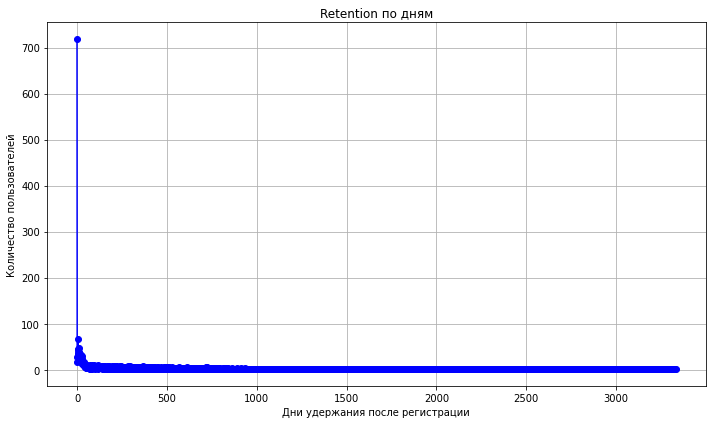

In [10]:
# Изобразим Retention игроков (по дням от даты регистрации игрока)
plt.figure(figsize=(10, 6))  
plt.plot(retention_counts['days_after_registration'], retention_counts['unique_users'], linestyle='-', marker='o', color='b')
plt.xlabel('Дни удержания после регистрации')
plt.ylabel('Количество пользователей')
plt.title('Retention по дням')
plt.grid(True)  # Добавим сетку на график
plt.tight_layout()  # Избавимся от обрезания подписей осей
plt.show()

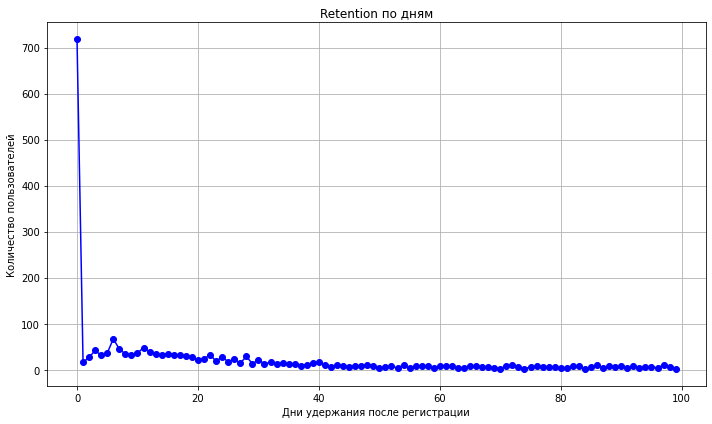

In [11]:
# График Retention первых 100 дней
retention_counts_100 = retention_counts.head(100)
plt.figure(figsize=(10, 6))  
plt.plot(retention_counts_100['days_after_registration'], retention_counts_100['unique_users'], linestyle='-', marker='o', color='b')
plt.xlabel('Дни удержания после регистрации')
plt.ylabel('Количество пользователей')
plt.title('Retention по дням')
plt.grid(True)  # Добавим сетку на график
plt.tight_layout()  # Избавимся от обрезания подписей осей
plt.show()

### **Вывод:**
#### Активность пользователей после регистрации можно разделить на следующие этапы:
1. Первый день после регистрации (0 день) имеет наибольшее количество уникальных пользователей - 719. Это может быть связано с тем, что большинство пользователей активно вовлекаются в приложение сразу после регистрации.

2. Во второй день после регистрации (1 день), количество уникальных пользователей снижается значительно до 16. Это может указывать на проблемы с удержанием пользователей после первого дня использования приложения.

3. С 2 по 6 день после регистрации, количество уникальных пользователей постепенно увеличивается, достигая пика в 67 уникальных пользователей на 6 день. Это может свидетельствовать о том, что в этот период пользователи всё ещё активны и заинтересованы в использовании приложения.

4. С 7 по 12 день после регистрации, количество уникальных пользователей снова начинает уменьшаться, но остается на относительно стабильном уровне около 30-40 уникальных пользователей.

5. С 13 по 31 день после регистрации, количество уникальных пользователей держится на относительно стабильном уровне около 10-35 уникальных пользователей.

6. После 31 дня после регистрации, количество уникальных пользователей дальше снижается и держится на низком уровне от 5 до 15 уникальных пользователей. Далее пройсходит снижение до 1 уникального пользователя в день.

## **Задание №2**
### На основе результатов A/B теста выявить:
### Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [12]:
# Загрузка данных из CSV файла
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kondrashkina/Проект_1_Задание_2.csv',sep=';')

In [13]:
data.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [14]:
data.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [15]:
print(data.isnull().sum())

user_id      0
revenue      0
testgroup    0
dtype: int64


In [16]:
print(data['testgroup'].unique())

['b' 'a']


In [17]:
data.groupby('testgroup', as_index=False).agg({'user_id':'count'})

,testgroup,user_id
0,a,202103
1,b,202667


In [18]:
# Разделение данных на контрольную и тестовую группы
control_group = data[data['testgroup'] == 'a']
test_group = data[data['testgroup'] == 'b']

In [19]:
# Расчет ARPU
arpu_control = control_group['revenue'].mean()
arpu_test = test_group['revenue'].mean()

In [20]:
# Расчет конверсии
paying_users_control = control_group[control_group['revenue'] > 0]['user_id'].count()
paying_users_test = test_group[test_group['revenue'] > 0]['user_id'].count()

conversion_control = paying_users_control / control_group['user_id'].count() if control_group['user_id'].count() > 0 else 0
conversion_test = paying_users_test / test_group['user_id'].count() if test_group['user_id'].count() > 0 else 0

In [21]:
# Расчет удержания
unique_paying_users_control = control_group[control_group['revenue'] > 0]['user_id'].nunique()
unique_paying_users_test = test_group[test_group['revenue'] > 0]['user_id'].nunique()

retention_control = unique_paying_users_control / control_group['user_id'].nunique() if control_group['user_id'].nunique() > 0 else 0
retention_test = unique_paying_users_test / test_group['user_id'].nunique() if test_group['user_id'].nunique() > 0 else 0

In [22]:
# Рассчитаем доверительные интервалы для Conversion Rate в каждой группе методом аппроксимации
conf_interval_conversion_rate_a = proportion_confint(sum(data[data['testgroup'] == 'a']['revenue'] > 0), len(data[data['testgroup'] == 'a']), method='wilson')
conf_interval_conversion_rate_b = proportion_confint(sum(data[data['testgroup'] == 'b']['revenue'] > 0), len(data[data['testgroup'] == 'b']), method='wilson')

In [23]:
# Проведение t-теста для статистической значимости различий ARPU
t_stat, p_value = stats.ttest_ind(control_group['revenue'], test_group['revenue'], equal_var=False, nan_policy='omit')

In [24]:
# Проверка статистической значимости
if pd.notna(p_value) and p_value < 0.05:
    significance = "Есть статистически значимая разница"
else:
    significance = "Нет статистически значимой разницы"

In [25]:
# Вывод результатов
print(f'ARPU в контрольной группе: {arpu_control}')
print(f'ARPU в тестовой группе: {arpu_test}')
print(f'Conversion Rate в контрольной группе: {conversion_control}')
print(f'Conversion Rate в тестовой группе: {conversion_test}')
print(f'Retention Rate в контрольной группе: {retention_control}')
print(f'Retention Rate в тестовой группе: {retention_test}')
print("Confidence Interval for Conversion Rate in Group a:")
print(conf_interval_conversion_rate_a)
print("\nConfidence Interval for Conversion Rate in Group b:")
print(conf_interval_conversion_rate_b)
print(f'p-value для различия ARPU: {p_value}')
print(significance)

ARPU в контрольной группе: 25.413719736965806
ARPU в тестовой группе: 26.75128659327863
Conversion Rate в контрольной группе: 0.009539690157988749
Conversion Rate в тестовой группе: 0.008906235351586593
Retention Rate в контрольной группе: 0.009539690157988749
Retention Rate в тестовой группе: 0.008906235351586593
Confidence Interval for Conversion Rate in Group a:
(0.0091251271180948, 0.009972897624462651)

Confidence Interval for Conversion Rate in Group b:
(0.008506406082001199, 0.00932468117657204)
p-value для различия ARPU: 0.5329647014130866
Нет статистически значимой разницы


### Интерпретация результатов A/B теста:

ARPU (Average Revenue Per User) в тестовой группе (26.75) выше, чем в контрольной группе (25.41). Это означает, что пользователи из тестовой группы принесли в среднем больше дохода, чем пользователи из контрольной группы.

Conversion Rate (процент пользователей, совершивших целевое действие) в контрольной группе (0.00954) немного выше, чем в тестовой группе (0.00891). Однако, разница между Conversion Rate в группах также очень небольшая.

Retention Rate (процент пользователей, вернувшихся и совершивших целевое действие) в контрольной и тестовой группах также практически идентичен, так как значения Conversion Rate и Retention Rate одинаковы.

P-value для различия ARPU составляет 0.533, что превышает стандартный уровень статистической значимости 0.05. Это означает, что различия в ARPU между группами не являются статистически значимыми. Таким образом, нулевая гипотеза, которая утверждает отсутствие разницы между группами, не может быть отклонена.

Доверительные интервалы для Conversion Rate в обеих группах достаточно узкие, что указывает на достаточно точные оценки метрик.

Итак, на основе предоставленных данных можно сделать вывод, что хотя ARPU в тестовой группе выше, чем в контрольной, разница не является статистически значимой. Кроме того, Conversion Rate и Retention Rate практически идентичны в обеих группах. Это может означать, что предложенные акционные предложения влияют на поведение пользователей, но эффект незначителен.

Важно также отметить, что результаты могут быть сильно зависимы от конкретных данных и условий A/B теста. Для более надежных выводов рекомендуется провести более длительное тестирование с большим количеством пользователей или рассмотреть другие факторы, которые могут повлиять на результаты теста.

## **Задание №3**
### С помощью каких метрик можно оценить результаты последнего прошедшего события? Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

### Для оценки результатов последнего прошедшего события в игре Plants & Gardens можно использовать следующие метрики:

1. Conversion Rate: Процент игроков, которые приступили к прохождению уровней события от общего числа уникальных игроков, которые зашли в игру во время события. Это позволит оценить, насколько хорошо игроки реагировали на событие и начали выполнять задания.

2. Retention Rate: Процент игроков, которые успешно завершили событие от числа тех, кто приступил к выполнению уровней события. Это покажет, какая часть игроков смогла завершить событие.

3. Average Progress: Средний прогресс игроков в прохождении уровней события. Может быть измерен, например, в виде среднего номера уровня, на котором остановились игроки, или среднего количества пройденных уровней. Это поможет понять, насколько успешно игроки выполняли задания.

4. Churn Rate: Процент игроков, которые прекратили участие в событии без его завершения. Это позволит определить, насколько сложно было событие и какие уровни или моменты в событии могут вызывать отток игроков.

5. Time Spent: Среднее время, которое игроки провели в игре во время события. Это покажет, насколько событие было привлекательным для игроков и как долго они уделяли ему внимание.

Относительно изменений в механике событий, когда неудачная попытка приводит к откату на несколько уровней назад, набор метрик для оценки результата может измениться. В частности, метрики Retention Rate и Churn Rate могут быть более чувствительными к такому изменению. Теперь игроки, столкнувшись с более сложными уровнями и неудачами, могут проявлять большую вероятность оттока из события. Это может повлиять на Retention Rate, так как завершение события может стать сложнее.

Также метрики Average Progress и Time Spent могут измениться, так как игрокам может потребоваться больше времени и усилий для прогресса в событии.

Поэтому, при изменении механики событий, важно переоценить и адаптировать метрики, которые наиболее точно отражают интерес и вовлеченность игроков в событие. Некоторые метрики могут остаться актуальными, но важно учитывать контекст и специфику изменений в событиях при анализе результатов.